# Package testing

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def imload(fpath):
    return cv2.cvtColor(cv2.imread(fpath), cv2.COLOR_BGR2RGB)

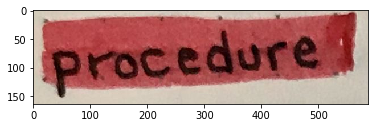

In [2]:
test = "../data-sources/highlighted-words/unseen_word_raw.png"
image = imload(test)
plt.imshow(image)

## `preprocessing` pkg

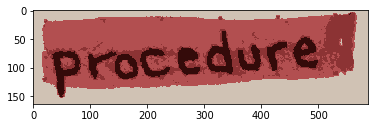

In [3]:
from preproc import Quantize

quantized_image = Quantize.reduce_palette(image, 4)
plt.imshow(quantized_image)

In [ ]:
def get_darkest_grayscale(image):
    

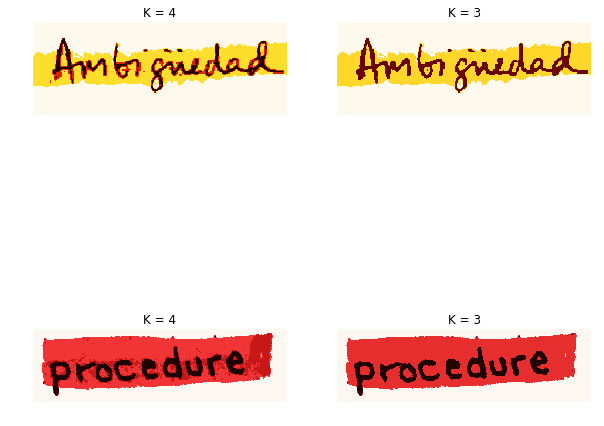

In [13]:
from preproc import Quantize

test1 = "../data-sources/highlighted-words/page0.png"
test2 = "../data-sources/highlighted-words/unseen_word.png"

image1 = imload(test1)
image2 = imload(test2)

quantized_image1 = Quantize.reduce_palette(image1, 4)
quantized_image2 = Quantize.reduce_palette(image1, 3)
quantized_image3 = Quantize.reduce_palette(image2, 4)
quantized_image4 = Quantize.reduce_palette(image2, 3)

_, axes = plt.subplots(2,2, figsize=(10,10))
axes = axes.flatten()

axes[0].imshow(quantized_image1)
axes[0].set_title("K = 4")
axes[0].axis("off")

axes[1].imshow(quantized_image2)
axes[1].set_title("K = 3")
axes[1].axis("off")

axes[2].imshow(quantized_image3)
axes[2].set_title("K = 4")
axes[2].axis("off")

axes[3].imshow(quantized_image4)
axes[3].set_title("K = 3")
axes[3].axis("off")

plt.show()

Wall time: 6.3 s


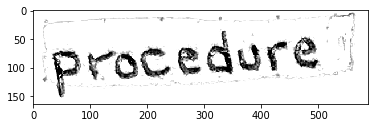

In [3]:
from preproc import RobustBinarize

%time bin_image = RobustBinarize.illumination_compensation(image)
plt.imshow(bin_image, cmap="gray")

In [3]:
from preproc import RobustBinarize

Default:

In [5]:
%timeit bin_image = RobustBinarize.illumination_compensation(image)

2.45 s ± 331 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


With numba and image downscaling:

In [4]:
%timeit bin_image = RobustBinarize.illumination_compensation(image)

16.8 ms ± 720 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
(2.45 * 1000) / 16.8

145.83333333333331

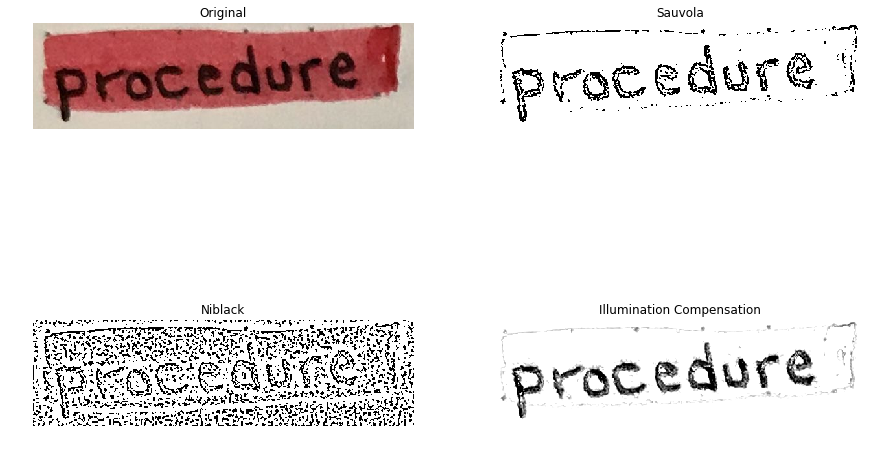

In [33]:
from skimage.filters import threshold_niblack, threshold_sauvola

gray = to_gray(image)

window_size = 9
thresh_niblack = threshold_niblack(gray, window_size=window_size, k=.5)
thresh_sauvola = threshold_sauvola(gray, window_size=window_size)

binary_niblack = gray > thresh_niblack
binary_sauvola = gray > thresh_sauvola

_, axes = plt.subplots(2,2, figsize=(15,10))
axes = axes.flatten()

axes[0].imshow(image)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(binary_sauvola, cmap="gray")
axes[1].set_title("Sauvola")
axes[1].axis("off")

axes[2].imshow(binary_niblack, cmap="gray")
axes[2].set_title("Niblack")
axes[2].axis("off")

axes[3].imshow(bin_image, cmap="gray")
axes[3].set_title("Illumination Compensation")
axes[3].axis("off")

plt.show()

In [6]:
%%time
test = "../data-sources/spanish-words-originals/test3_mini_lowq.jpg"
image = RobustBinarize.imread(test)

bin_image = RobustBinarize.illumination_compensation(image)

Wall time: 344 ms


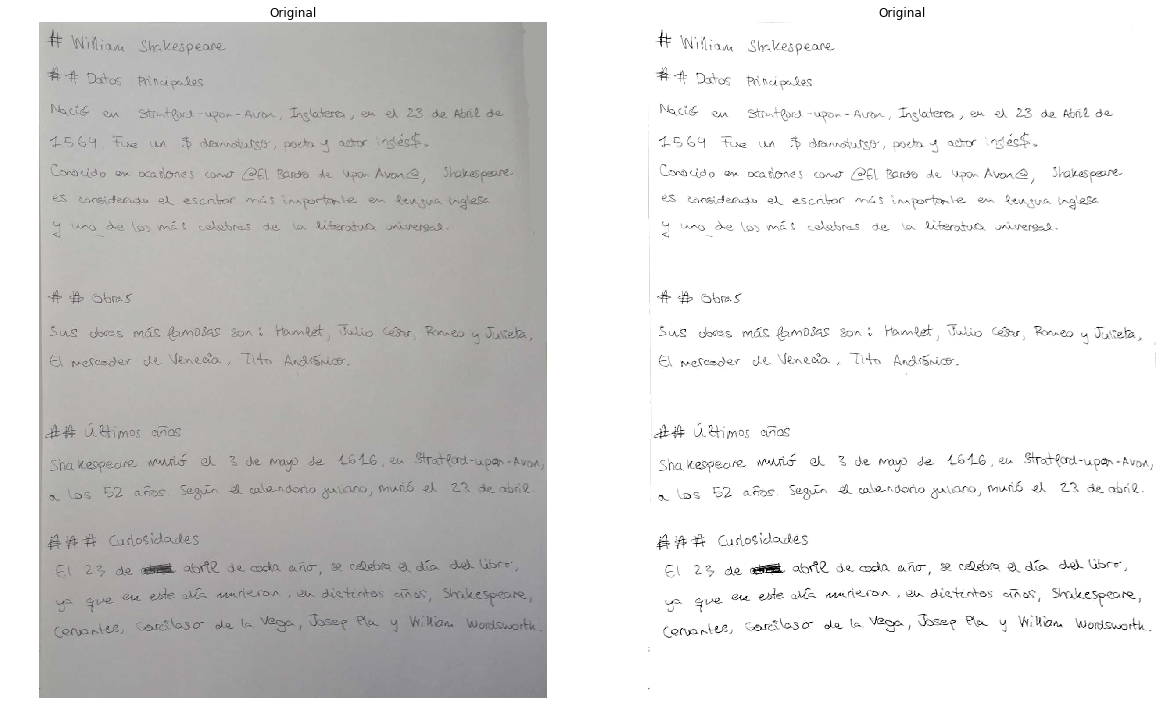

In [7]:
_, axes = plt.subplots(1, 2, figsize=(20,20))

axes[0].imshow(image)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(bin_image, cmap="gray")
axes[1].set_title("Original")
axes[1].axis("off")

plt.show()

Wall time: 1.33 s


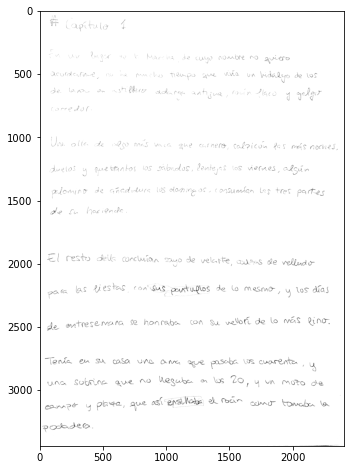

In [12]:
%%time
test = "../data-sources/spanish-words-originals/test1.jpg"
image = RobustBinarize.imread(test)

bin_image = RobustBinarize.illumination_compensation(image)
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.47 s


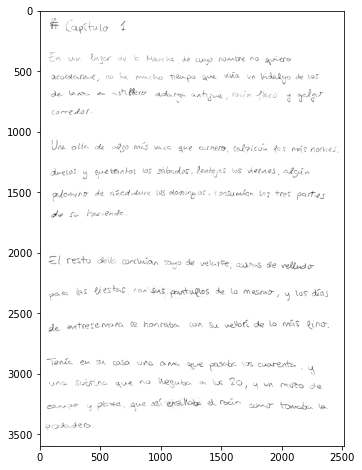

In [13]:
%%time
test = "../data-sources/spanish-words-originals/test2.jpg"
image = RobustBinarize.imread(test)

bin_image = RobustBinarize.illumination_compensation(image)
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 800 ms


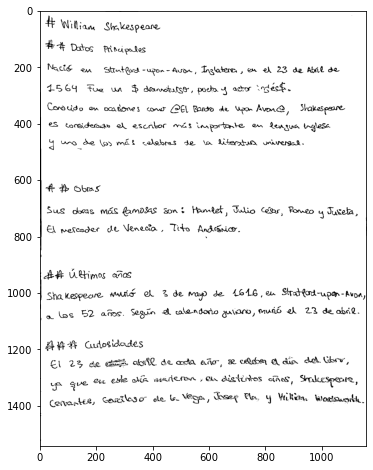

In [6]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test3_mini_lowq.jpg"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=23)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.21 s


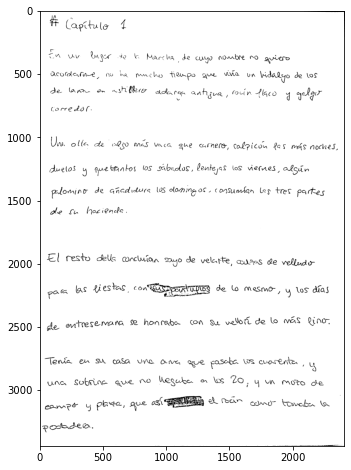

In [10]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test1.JPG"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=23)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.3 s


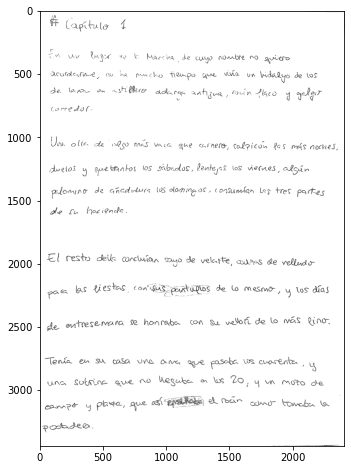

In [11]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test1.JPG"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=7)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.4 s


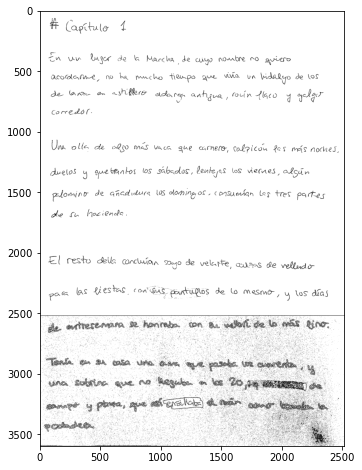

In [14]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test2.JPG"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=7)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.43 s


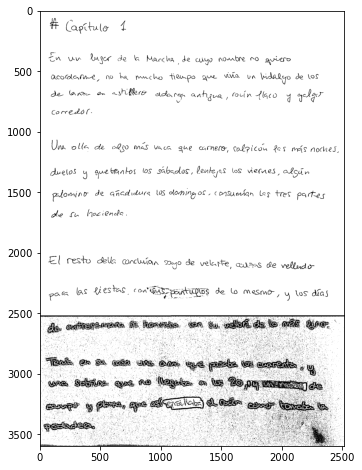

In [15]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test2.JPG"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=21)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 330 ms


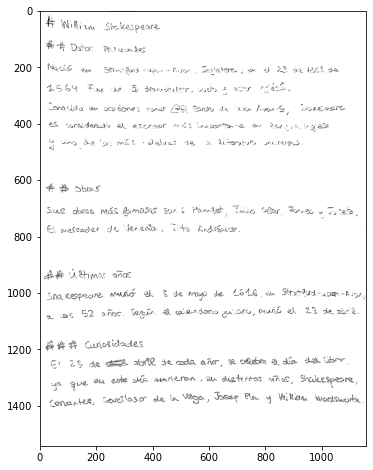

In [8]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test3_mini_lowq.jpg"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=3)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

---

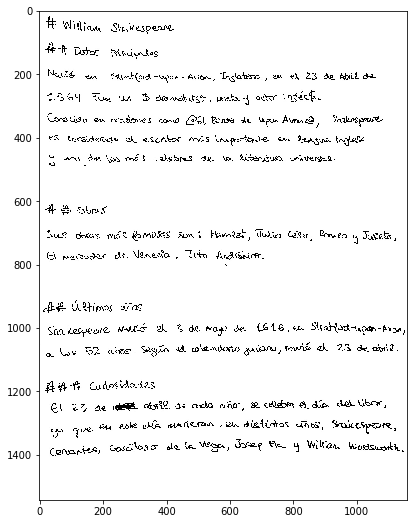

In [1]:
from preproc import LineSegmentation, RobustBinarize
import matplotlib.pyplot as plt
import numpy as np
import cv2

plt.rcParams['figure.figsize'] = (10, 9)

# input: binarized (or grayscale) image in BGR mode
image = cv2.imread("../data-sources/spanish-words-originals/test3_mini_lowq_bin.jpg")

plt.imshow(image)
plt.show()

In [4]:
%%time
lines = LineSegmentation(image).segment()

Wall time: 2.63 s


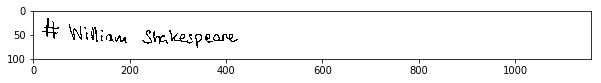

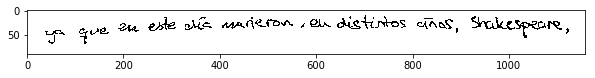

In [7]:
plt.figure()
plt.imshow(lines[0][0], cmap="gray")
plt.show()

plt.figure()
plt.imshow(lines[-2][0], cmap="gray")
plt.show()

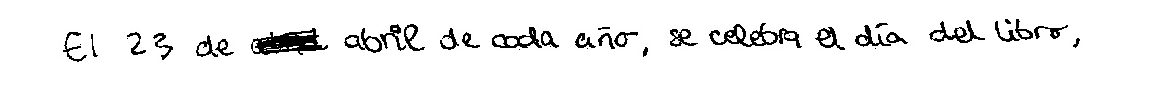

In [30]:
plt.figure(figsize=(20,10))
plt.imshow(lines[-3][0], cmap="gray")
plt.axis("off")
plt.show()

---

In [18]:
from preproc import WordSegmentation

line, params = lines[-3]

splitter = WordSegmentation(line, params)
words = splitter.get_words()

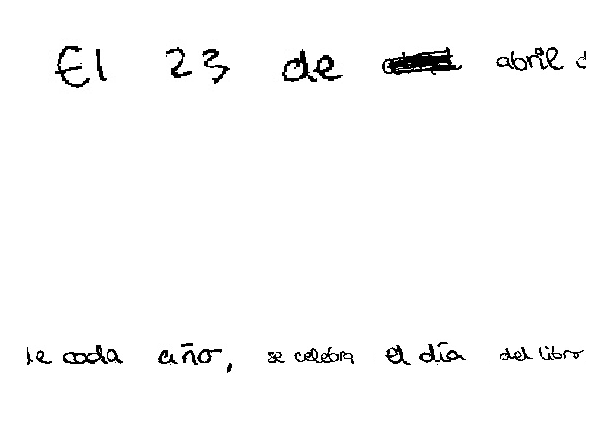

In [25]:
fig, axes = plt.subplots(2, len(words) // 2)
axes = axes.flatten()

for i, (wrd, _) in enumerate(words):
    axes[i].imshow(wrd, cmap="gray")
    axes[i].axis("off")

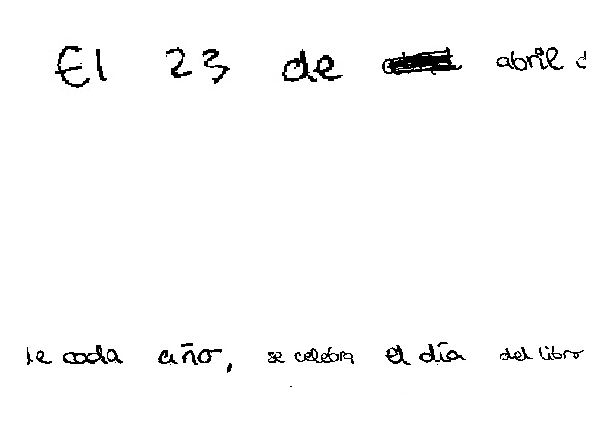

In [31]:
fig, axes = plt.subplots(2, len(words) // 2)
axes = axes.flatten()

for i, (_, (xmin, ymin, xmax, ymax)) in enumerate(words):
    axes[i].imshow(image[xmin:xmax, ymin:ymax], cmap="gray")
    axes[i].axis("off")

# `languages` pkg

In [1]:
from languages import LanguageTransformer, HTMLMinidownColorListener

LanguageTransformer(
    listener=HTMLMinidownColorListener,
    fpath="languages/examples/three.hmd",
    output_fpath="languages/tmp/hello.html"
)

In [2]:
from IPython.display import IFrame

IFrame(src='./languages/tmp/hello.html', width=700, height=300)

# `recognition` package

## `spanish-mini` dataset

A custom dataset of 552 samples.

In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py as h5
import cv2

source_dir = "../packages/samples/spanish-words-mini"
dest_dir = "../data-sources/minified"

es_data = pd.read_csv(f"{source_dir}/all_words.txt", sep=" ", skiprows=27)
es_data = es_data[es_data["id"].str.contains("bw")]

es_data["fpath"] = es_data["id"].apply(lambda x: f"{x}.png")

print(es_data.shape)
es_data.head(2)

(552, 11)


,id,seg,bin,comp,bb_x,bb_y,bb_w,bb_h,tag,word,fpath
0,w01_bw_01,NaN,154,NaN,X,Y,W,H,NaN,pañuelo,w01_bw_01.png
1,w01_bw_02,NaN,154,NaN,X,Y,W,H,NaN,enseñar,w01_bw_02.png


In [7]:
heights, widths = [], []

for fpath in es_data["fpath"]:
    image = cv2.imread(f"{source_dir}/{fpath}", 0)
    heights.append(image.shape[0])
    widths.append(image.shape[1])

print(np.mean(heights), np.mean(widths))

106.7663043478261 223.58333333333334


In [19]:
es_data["id"].apply(lambda x: x.split("_")[0]).value_counts()

w101    157
w100    137
w04      59
w02      39
w09      36
w07      34
w08      32
w01      24
w05      14
w03      14
w06       6
Name: id, dtype: int64

Moreover, **in our custom dataset, whitespaces in the `word` column are encoded with `_`** - we have to decode it to obtain the right predictions.

In [2]:
es_data["word"] = es_data["word"].apply(lambda x: x.replace("_", " "))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(es_data, es_data["word"], test_size=0.2, shuffle=True, random_state=321)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, X_train["word"], test_size=0.1, shuffle=True, random_state=321)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Valid set: {X_valid.shape}")

Train set: (396, 11)
Test set: (111, 11)
Valid set: (45, 11)


In [4]:
%%time

from recognition import TinyData

TinyData.minify(
    X_train, X_test, X_valid,
    source_dir=source_dir, target_path=f"{dest_dir}/spanish.h5",
    name_label="id", x_label="fpath", y_label="word",
    color=False
)

Using TensorFlow backend.
396it [00:02, 138.51it/s]
111it [00:00, 152.98it/s]
45it [00:00, 91.64it/s]

Done
Wall time: 7.42 s


(Training Set) Label: #
[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


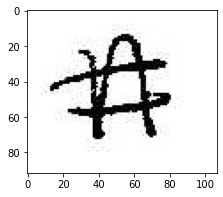

In [6]:
zipped_data = h5.File(f"{dest_dir}/spanish.h5", "r")

sample_key = list(zipped_data["train"].keys())[-10]
sample_value = zipped_data["train"].get(sample_key)

print("(Training Set) Label:", sample_value.attrs.get("label").decode("utf-8"))
print(sample_value.attrs["intlabel"][:])

plt.figure(figsize=(5,3))
plt.imshow(sample_value[:], cmap="gray")
plt.show()

zipped_data.close()

## `IAM-word` dataset

A custom dataset of 75602 samples.

In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os

source_dir = "../data-sources/iam-word-dataset"
dest_dir = "../data-sources/minified"

iam_data = pd.read_csv(f"{source_dir}/words.csv", sep=";")
iam_data["word"] = iam_data["word"].apply(str.strip)

print(iam_data.shape)
iam_data.head(2)

(115320, 12)


,id,seg,bin,bb_x,bb_y,bb_w,bb_h,tag,word1,word2,word3,word
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A,NaN,NaN,A
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE,NaN,NaN,MOVE


In [9]:
def id_to_fpath(_id: str):
    form_group, form_id, _, _ = _id.split("-")
    return f"{form_group}/{form_group}-{form_id}/{_id}.png"
    
iam_data["fpath"] = iam_data["id"].apply(id_to_fpath)
iam_data["line_id"] = iam_data["id"].apply(lambda x: x[:-3])

print(iam_data.shape)
iam_data.head(2)

(115320, 14)


,id,seg,bin,bb_x,bb_y,bb_w,bb_h,tag,word1,word2,word3,word,fpath,line_id
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A,NaN,NaN,A,a01/a01-000u/a01-000u-00-00.png,a01-000u-00
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE,NaN,NaN,MOVE,a01/a01-000u/a01-000u-00-01.png,a01-000u-00


In [10]:
filter_empty_files = iam_data["fpath"].apply(lambda x: os.path.getsize(f"{source_dir}/{x}") > 0)
iam_data = iam_data[filter_empty_files]

print(iam_data.shape)
iam_data.head(2)

(115318, 14)


,id,seg,bin,bb_x,bb_y,bb_w,bb_h,tag,word1,word2,word3,word,fpath,line_id
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A,NaN,NaN,A,a01/a01-000u/a01-000u-00-00.png,a01-000u-00
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE,NaN,NaN,MOVE,a01/a01-000u/a01-000u-00-01.png,a01-000u-00


In [11]:
heights, widths = [], []

for fpath in iam_data["fpath"]:
    image = cv2.imread(f"{source_dir}/{fpath}", 0)
    heights.append(image.shape[0])
    widths.append(image.shape[1])

print(np.mean(heights), np.mean(widths))

70.04543089543697 155.75576232678333


In [10]:
iam_data["word"].value_counts()

the           5826
,             5570
.             4984
of            3192
to            2651
              ... 
ANY              1
approve          1
Become           1
settling         1
suffocated       1
Name: word, Length: 13528, dtype: int64

### Split into train / test / validation sets

These sets are preset in `.txt` files.

In [10]:
splits_dir = "../data-sources/iam-word-dataset/largeWriterIndependentTextLineRecognitionTask"

train_set_ids = pd.read_csv(f"{splits_dir}/trainset.txt", names=["id"])
test_set_ids = pd.read_csv(f"{splits_dir}/testset.txt", names=["id"])
valid1_set_ids = pd.read_csv(f"{splits_dir}/validationset1.txt", names=["id"])
valid2_set_ids = pd.read_csv(f"{splits_dir}/validationset2.txt", names=["id"])

print(train_set_ids.shape)
train_set_ids.head(2)

(6161, 1)


,id
0,a01-000u-00
1,a01-000u-01


In [11]:
filter_train, filter_test, filter_valid = False, False, False

for _, row in train_set_ids.iterrows():
    filter_train = filter_train | (iam_data["line_id"] == row.id)
    
for _, row in test_set_ids.iterrows():
    filter_test = filter_test | (iam_data["line_id"] == row.id)
    
for _, row in valid1_set_ids.iterrows():
    filter_valid = filter_valid | (iam_data["line_id"] == row.id)
    
for _, row in valid2_set_ids.iterrows():
    filter_valid = filter_valid | (iam_data["line_id"] == row.id)

In [12]:
train_set = iam_data[filter_train]
test_set = iam_data[filter_test]
valid_set = iam_data[filter_valid]

print(train_set.shape, test_set.shape, valid_set.shape)

(53839, 14) (17616, 14) (16465, 14)


Check out this alternative implementation (it's waaaaaaaaaay slower!):

```python
train_data = pd.DataFrame(columns=["fpath", "word"])

for line in train_iam_data:
    subset = iam_data[iam_data["id"].str.contains(line)]
    
    train_data = pd.concat([train_data, subset[["fpath", "word"]]])
    
# CPU Wall time: 5min 39s
```

In [13]:
%%time

from recognition import TinyData

TinyData.minify(
    train_set, test_set, valid_set,
    source_dir=source_dir, target_path=f"{dest_dir}/iam.h5",
    name_label="id", x_label="fpath", y_label="word",
    color=False
)

53839it [04:24, 203.50it/s]
17616it [01:20, 217.58it/s]
16465it [01:23, 197.82it/s]

Done
Wall time: 7min 8s


(Test Set) Label: entrance
[62 71 77 75 58 71 60 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0]


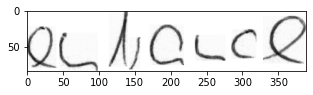

In [14]:
zipped_data = h5.File(f"{dest_dir}/iam.h5", "r")

sample_key = list(zipped_data["test"].keys())[20]
sample_value = zipped_data["test"].get(sample_key)

print("(Test Set) Label:", sample_value.attrs.get("label").decode("utf-8"))
print(sample_value.attrs.get("intlabel"))

plt.figure(figsize=(5,3))
plt.imshow(sample_value[:], cmap="gray")
plt.show()

zipped_data.close()

## `RIMES2011-word` dataset

+ Dataset of french words with 75602 samples.
+ Predefined train / test / validation splits are defined in `.txt` files.
+ Dataset is already classified into the different splits.

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import os

source_dir = "../data-sources/rimes-words-2011"
dest_dir = "../data-sources/minified"

train_set = pd.read_csv(f"{source_dir}/train_set/groundtruth_training_icdar2011.txt", sep=" ", names=["fpath", "word"])
test_set = pd.read_csv(f"{source_dir}/test_set/grount_truth_test_icdar2011.txt", sep=" ", names=["fpath", "word"])
valid_set = pd.read_csv(f"{source_dir}/valid_set/ground_truth_validation_icdar2011.txt", sep=" ", names=["fpath", "word"])

print("Train:", train_set.shape, "| Test:", test_set.shape, "| Validation:", valid_set.shape)
train_set.head(2)

Train: (51739, 2) | Test: (7776, 2) | Validation: (7464, 2)


,fpath,word
0,lot_1/00001_L/00001_L_0_0.tiff,Suite
1,lot_1/00001_L/00001_L_2_0.tiff,meilleurs


### Removing empty or inexistent files

In [14]:
from recognition import TinyData
import cv2

image_path = f"{source_dir}/train_set/{train_set.loc[1, 'fpath']}"
image = TinyData.imread(image_path)
                        
print(image.shape, train_set.loc[1, 'word'])
plt.figure(figsize=(3,3))
plt.imshow(image, cmap="gray")

Using TensorFlow backend.


SyntaxError: invalid syntax (text.py, line 179)

In [3]:
os.path.isfile(f"{source_dir}/train_set/{train_set.loc[0, 'fpath']}")

False

In [17]:
def non_empty_file(fpath):
    """Filter out files that don't exist or are empty"""
    if os.path.isfile(fpath):
        return os.path.getsize(fpath) > 0
    else:
        return False

filter_empty_files = train_set["fpath"].apply(lambda x: non_empty_file(f"{source_dir}/train_set/{x}"))
train_set = train_set[filter_empty_files]

filter_empty_files = test_set["fpath"].apply(lambda x: non_empty_file(f"{source_dir}/test_set/{x}"))
test_set = test_set[filter_empty_files]

filter_empty_files = valid_set["fpath"].apply(lambda x: non_empty_file(f"{source_dir}/valid_set/{x}"))
valid_set = valid_set[filter_empty_files]

print("Train:", train_set.shape, "| Test:", test_set.shape, "| Validation:", valid_set.shape)

Train: (51738, 2) | Test: (7776, 2) | Validation: (7464, 2)


In [5]:
train_set["name"] = train_set["fpath"].apply(lambda x: x.replace(".tiff", "").split("/")[-1])
test_set["name"] = test_set["fpath"].apply(lambda x: x.replace(".tiff", "").split("/")[-1])
valid_set["name"] = valid_set["fpath"].apply(lambda x: x.replace(".tiff", "").split("/")[-1])

valid_set.head(2)

,fpath,word,name
0,lot_14/01351_L/01351_L_0_0.tiff,Lors,01351_L_0_0
1,lot_14/01351_L/01351_L_0_1.tiff,de,01351_L_0_1


In [23]:
heights, widths = [], []

for fpath in train_set["fpath"]:
    image = cv2.imread(f"{source_dir}/all_sets/{fpath}", 0)
    heights.append(image.shape[0])
    widths.append(image.shape[1])

for fpath in test_set["fpath"]:
    image = cv2.imread(f"{source_dir}/all_sets/{fpath}", 0)
    heights.append(image.shape[0])
    widths.append(image.shape[1])
    
for fpath in valid_set["fpath"]:
    image = cv2.imread(f"{source_dir}/all_sets/{fpath}", 0)
    heights.append(image.shape[0])
    widths.append(image.shape[1])
    
print(np.mean(heights), np.mean(widths))

72.17520678431724 186.13707486040192


In [6]:
%%time
from recognition import TinyData

# I temporarily created a folder "all_sets" and moved there all image folders - instead of modifying the package :\/
TinyData.minify(
    train_set, test_set, valid_set,
    source_dir=f"{source_dir}/all_sets", target_path=f"{dest_dir}/rimes2011.h5",
    name_label="name", x_label="fpath", y_label="word",
    color=False
)

51738it [09:12, 93.58it/s]
7776it [01:20, 96.03it/s]
7464it [01:19, 94.36it/s]

Done
Wall time: 11min 53s


In [29]:
zipped_data["valid"][sample_key].attrs["label"]

b'Lors'

(Validation Set) Label: de


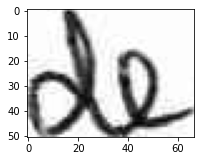

In [33]:
zipped_data = h5.File(f"{dest_dir}/rimes2011.h5", "r")

sample_key = list(zipped_data["valid"].keys())[1]
sample_value = zipped_data["valid"].get(sample_key)

print("(Validation Set) Label:", sample_value.attrs.get("label").decode("utf-8"))

plt.figure(figsize=(3,3))
plt.imshow(sample_value[:], cmap="gray")
plt.show()

zipped_data.close()

---

## `spelling`

In [ ]:
from recognition import TextChecker

predicted_text = [
    "En um tugar de la Mancha, de cuio nombre no quiero acordarme, no ha mucho tiempo que vivía un",
    "hidalgo de los de lanza en astihhero, adarga antigua, rocín flaco y galgo corredor. Una olla de algo más",
    "vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lantejas los viernes, algún",
    "palomino de añadidura los domingos, consumían las tres partes de su hacienda."
]

corrector = TextChecker(predicted_text)
print(corrector.correct())

---

## `text`

In [1]:
from recognition import RecognitionNet, StringVectorizer
import matplotlib.pyplot as plt
import numpy as np
import cv2

def to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def imload(fpath):
    return cv2.cvtColor(cv2.imread(fpath), cv2.COLOR_BGR2RGB)

net = RecognitionNet(".")
net.load_chkpt()
net.model.summary()

Using TensorFlow backend.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 256, 64, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 32, 16)       160       
_________________________________________________________________
p_re_lu (PReLU)              (None, 128, 32, 16)       16        
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 32, 16)       64        
_________________________________________________________________
full_gated_conv2d (FullGated (None, 128, 32, 16)       4640      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 32, 32)       4640      
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 128, 32, 32)       32    

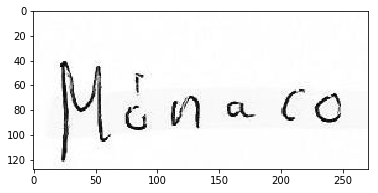

In [27]:
image = imload("../data-sources/spanish-words-mini/w09_bw_07.png")
image = to_gray(image)

plt.imshow(image, cmap="gray")
plt.show()

In [28]:
width, height, _ = net.model.layers[0].input_shape[0][1:]
IMAGE_RATIO = width / height

image = RecognitionNet.preprocess(image, aspect_ratio=IMAGE_RATIO, target_size=(width, height))
image = np.expand_dims(image, axis=0)

image.shape

(1, 256, 64, 1)

In [29]:
vect = StringVectorizer()

preds, probs = net.predict(image)

output = vect.decode(preds[0].flatten())
print(output)

ce


---

## `color`

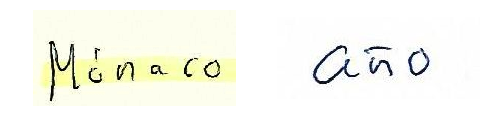

In [14]:
from PIL import Image
from preproc import Quantize
import matplotlib.pyplot as plt
import numpy as np
import cv2

def imload(fpath):
    return cv2.cvtColor(cv2.imread(fpath), cv2.COLOR_BGR2RGB)

image1 = imload("../data-sources/spanish-words-mini/w09_rgb_07.png")
image2 = imload("../data-sources/spanish-words-mini/w09_rgb_08.png")
# image = Quantize.reduce_palette(image, num_colors=4)
# image = (image * 255.).astype(np.uint8)

_, axes = plt.subplots(1, 2, figsize=(8,5))

axes[0].imshow(image1)
axes[0].axis("off")
axes[1].imshow(image2)
axes[1].axis("off")
plt.show()

In [3]:
from recognition import HighlightDetector

net = HighlightDetector()
net.load_model()
net.model.summary()

Using TensorFlow backend.


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 148, 148, 32)      896       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 72, 72, 32)        9248      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 36, 36, 32)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 34, 34, 64)        18496     
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18496)            

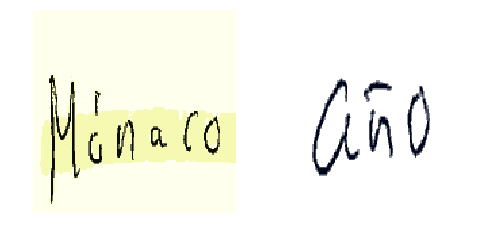

In [15]:
height, width, _ = net.model.layers[0].input_shape[1:]

# image is resized to meeet net's input shape, then color-quantized and scaled down to [0..1]
image1 = cv2.resize(image1, (height, width), cv2.INTER_CUBIC)
image1 = HighlightDetector.preprocess(image1)

image2 = cv2.resize(image2, (height, width), cv2.INTER_CUBIC)
image2 = HighlightDetector.preprocess(image2)

_, axes = plt.subplots(1, 2, figsize=(8,5))
axes[0].imshow(image1)
axes[0].axis("off")
axes[1].imshow(image2)
axes[1].axis("off")
plt.show()

In [17]:
1 - (1.5 * 60) / (20 * 60)

0.925

In [15]:
717 / (1024 + 340)

0.5256598240469208

In [20]:
# innput = np.expand_dims(image, axis=0)
innput = np.concatenate([[image1], [image2]])

in_class = net.predict(innput)

for pred_class in in_class:
    print(HighlightDetector.decode(pred_class))

Highlighted
Non-highlighted


---

In [15]:
from recognition import ColorGroup, ColorExtractor

predictor = ColorGroup()
colors = ColorExtractor(image).palette()
print(colors)

[array([[252, 252, 236]]), array([[244, 252, 180]]), array([[20, 20,  4]]), array([[140, 140, 116]])]


In [17]:
cnames = [predictor.predict(color) for color in colors]

cnames[:3]

['white', 'white', 'black']